<a href="https://colab.research.google.com/github/csanicola74/Important_Reference_Repo/blob/main/Python/Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferential Statistics
Inferential statistics refers to methods that allow researchers to extend conclusions from samples to populations. Unlike descriptive statistics which merely summarize the data, inferential statistics helps make predictions or inferences about a population based on data collected from a sample of that population.

Here are some key components and methods often associated with inferential statistics:

1. **Hypothesis Testing**:
   - Enables researchers to test assumptions or theories by comparing sample statistics to presumed population parameters.
   
2. **Confidence Intervals**:
   - Provides a range within which a population parameter is likely to lie, with a certain level of confidence.
   
3. **Regression Analysis**:
   - Helps in understanding relationships among variables and predicting one variable based on others.
   
4. **ANOVA and t-Tests**:
   - Used for comparing means across groups to see if there are significant differences.
   
5. **Correlation and Causation Analysis**:
   - Helps in understanding the strength and direction of relationships between variables.

## Importance for Scientific Papers:

1. **Generalization**:
   - Enables researchers to make generalizations from a sample to a broader population, which is fundamental for the applicability and impact of the research findings.

2. **Testing Hypotheses**:
   - Provides a structured framework for testing hypotheses and theories which is at the core of scientific inquiry.

3. **Evidence-Based Conclusions**:
   - Provides evidence to support claims and conclusions, thus contributing to the credibility and validity of the research.

4. **Uncertainty Quantification**:
   - Helps in quantifying the uncertainty associated with conclusions and predictions, which is crucial for understanding the limits of the findings.

5. **Decision Making**:
   - Informs decision-making by providing insights into relationships, differences, and effects, which is especially crucial in fields like medicine, social sciences, and policy-making.

6. **Replicability and Comparability**:
   - Standard statistical methods allow for the replication of studies by other researchers and the comparison of results across studies, contributing to the advancement of knowledge in a particular field.

7. **Visual Representation**:
   - Through graphs and plots, inferential statistics help in visually representing complex relationships and findings in a comprehensible manner, making the research accessible to a wider audience.

Inferential statistics are indispensable in scientific papers as they provide the necessary framework for testing theories, making predictions, and drawing evidence-based conclusions, which are fundamental for the advancement of science and informed decision-making.

# Scripts

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/csanicola74/Important_Reference_Repo/main/Data/sample_patient_data.csv')

# Set style for seaborn
sns.set(style="whitegrid")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:", categorical_cols)

# Identify continuous columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Continuous Columns:", continuous_cols)

Categorical Columns: Index(['patient_id', 'race', 'gender', 'icd10_diagnosis_1',
       'icd10_diagnosis_2', 'cpt_1', 'cpt_2', 'surgery_date', 'surgeon',
       'admit_date', 'discharge_date', 'seen_30days', 'occurrence_y/n',
       'occurrence_type'],
      dtype='object')
Continuous Columns: Index(['age', 'zipcode', 'weight_kg', 'height_cm', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'cholesterol_level', 'blood_glucose_level'],
      dtype='object')


## Data Cleaning/Transformation

In [2]:
# Identify columns with more than 5 unique values
cols_with_more_than_5_unique = [col for col in df.columns if df[col].nunique() > 5]

print("Columns with more than 5 unique values:", cols_with_more_than_5_unique)

print(df['icd10_diagnosis_1'].unique())
print(df['cpt_1'].unique())

Columns with more than 5 unique values: ['patient_id', 'age', 'zipcode', 'icd10_diagnosis_1', 'icd10_diagnosis_2', 'cpt_1', 'cpt_2', 'surgery_date', 'surgeon', 'admit_date', 'discharge_date', 'weight_kg', 'height_cm', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol_level', 'blood_glucose_level']
['D744' 'D132' 'D502' 'D465' 'D719' 'D252' 'D398' 'D305' 'D302' 'D655'
 'D757' 'D116' 'D121' 'D927' 'D691' 'D455' 'D653' 'D625' 'D761' 'D894'
 'D921' 'D930' 'D323' 'D471' 'D608' 'D698' 'D441' 'D226' 'D747' 'D893'
 'D332' 'D403' 'D460' 'D701' 'D366' 'D888' 'D129' 'D963' 'D138' 'D741'
 'D365' 'D111' 'D382' 'D754' 'D538' 'D954' 'D629' 'D827' 'D630' 'D845'
 'D423' 'D620' 'D109' 'D446' 'D348' 'D163' 'D918' 'D857' 'D702' 'D899'
 'D520' 'D511' 'D357' 'D381' 'D540' 'D871' 'D115' 'D950' 'D641' 'D900'
 'D419' 'D736' 'D840' 'D628' 'D648' 'D841' 'D854' 'D493' 'D985' 'D801'
 'D542' 'D822' 'D202' 'D948' 'D416' 'D728' 'D457' 'D850' 'D992' 'D802'
 'D565' 'D589' 'D607' 'D933' 'D136' 'D904' '

In [3]:
# grouping the categorical variables for all columns where there are more than 5 unique values
# ICD Grouping
df['grouped_icd10_1'] = 'D' + (df['icd10_diagnosis_1'].str[1:4].astype(int) // 100).astype(str).str.zfill(3)
print(df['grouped_icd10_1'].value_counts())
df['grouped_icd10_2'] = 'D' + (df['icd10_diagnosis_2'].str[1:4].astype(int) // 100).astype(str).str.zfill(3)
print(df['grouped_icd10_2'].value_counts())

# CPT Grouping
df['grouped_cpt_1'] = 'C' + (df['cpt_1'].str[1:5].astype(int) // 1000).astype(str).str.zfill(4)
print(df['grouped_cpt_1'].value_counts())
df['grouped_cpt_2'] = 'C' + (df['cpt_2'].str[1:5].astype(int) // 1000).astype(str).str.zfill(4)
print(df['grouped_cpt_2'].value_counts())

grouped_icd10_1
D008    125
D003    121
D009    118
D002    112
D006    110
D007    106
D001    103
D005    103
D004    102
Name: count, dtype: int64
grouped_icd10_2
D003    129
D007    123
D008    115
D009    115
D001    113
D004    113
D002    105
D005     98
D006     89
Name: count, dtype: int64
grouped_cpt_1
C0005    125
C0008    124
C0001    123
C0009    117
C0004    117
C0006    111
C0003     98
C0002     98
C0007     87
Name: count, dtype: int64
grouped_cpt_2
C0007    120
C0009    119
C0005    116
C0002    114
C0001    113
C0003    108
C0008    104
C0006    103
C0004    103
Name: count, dtype: int64


In [4]:
# Convert the 'surgery_date' column to a datetime object
df['surgery_date'] = pd.to_datetime(df['surgery_date'])

# Extract month and year
df['year'] = df['surgery_date'].dt.year
df['month'] = df['surgery_date'].dt.month

# Combine year and month into a single column
df['sx_year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

print(df['sx_year_month'])

0      2017-10
1      2017-07
2      2019-07
3      2021-08
4      2019-03
        ...   
995    2020-02
996    2022-12
997    2021-09
998    2019-03
999    2019-06
Name: sx_year_month, Length: 1000, dtype: object


In [5]:
# select the target variable
target_variable = df['gender']

# select the categorical columns
categorical_variables = ['zipcode', 'race', 'grouped_icd10_1', 'grouped_icd10_2', 'grouped_cpt_1', 'grouped_cpt_2', 'sx_year_month', 'surgeon', 'seen_30days', 'occurrence_y/n', 'occurrence_type']
print(df[categorical_variables])

# select the continuous columns
continuous_variables = ['age', 'weight_kg', 'height_cm', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol_level', 'blood_glucose_level']
print(df[continuous_variables])

     zipcode      race grouped_icd10_1 grouped_icd10_2 grouped_cpt_1  \
0      44786     Other            D007            D003         C0008   
1      38612     Asian            D001            D007         C0001   
2      94097     Asian            D005            D008         C0007   
3      70401     Black            D004            D005         C0003   
4      84258     Black            D007            D007         C0001   
..       ...       ...             ...             ...           ...   
995    34141     Other            D001            D009         C0004   
996    46330     Black            D007            D007         C0009   
997    99960  Hispanic            D007            D009         C0005   
998    41535  Hispanic            D002            D006         C0008   
999    21884     White            D002            D009         C0002   

    grouped_cpt_2 sx_year_month        surgeon seen_30days occurrence_y/n  \
0           C0007       2017-10    Sarah Davis         Yes

## Analysis Scripts

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


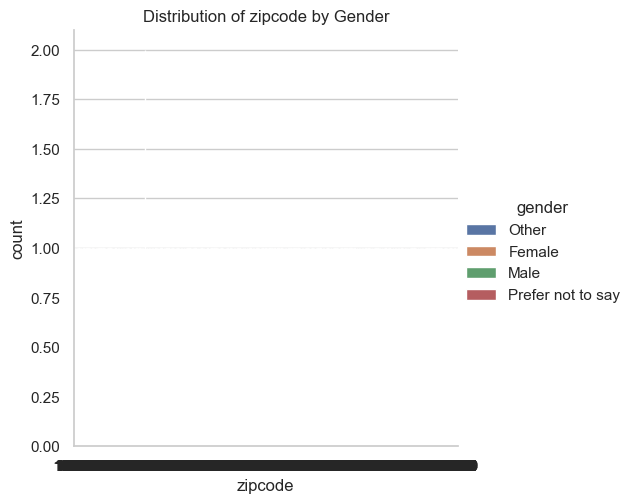

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


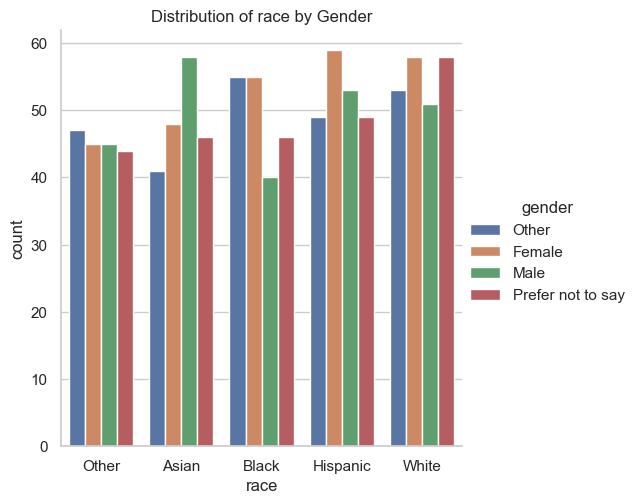

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


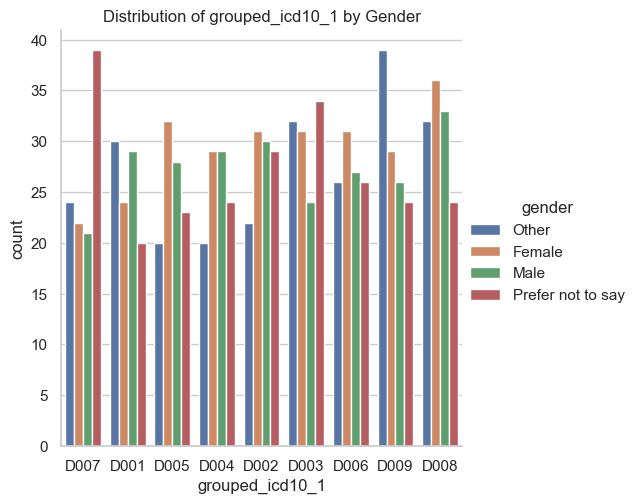

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


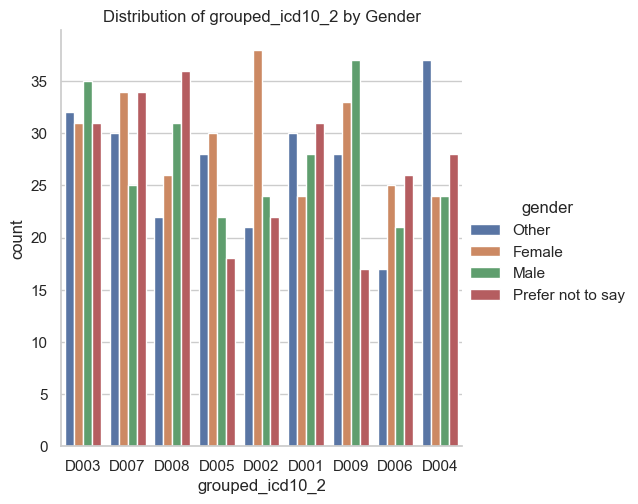

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


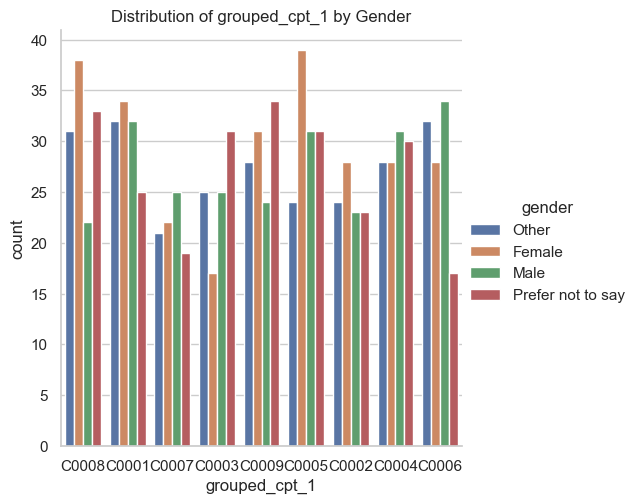

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


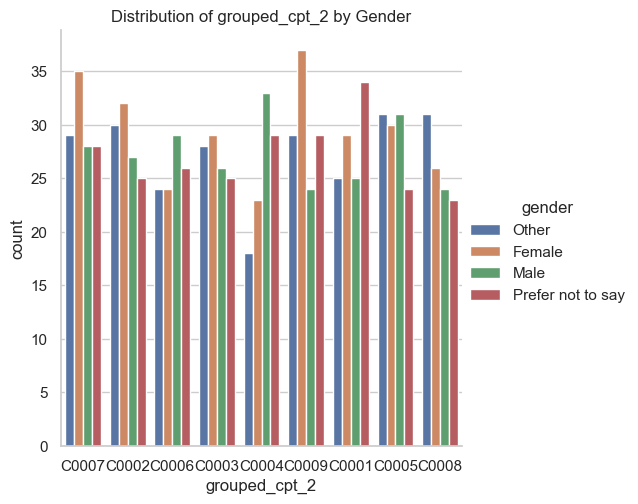

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


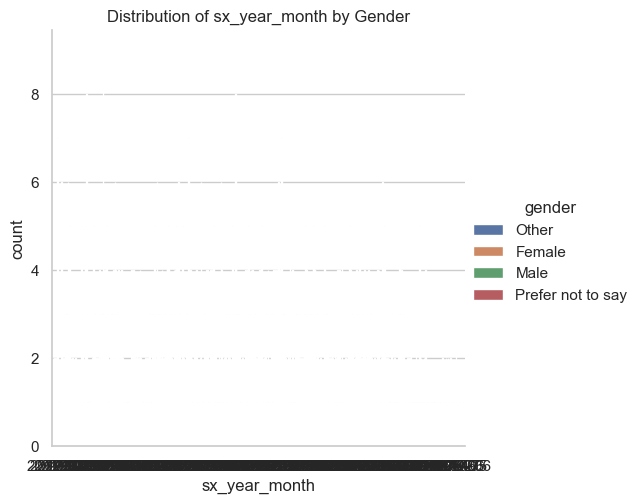

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


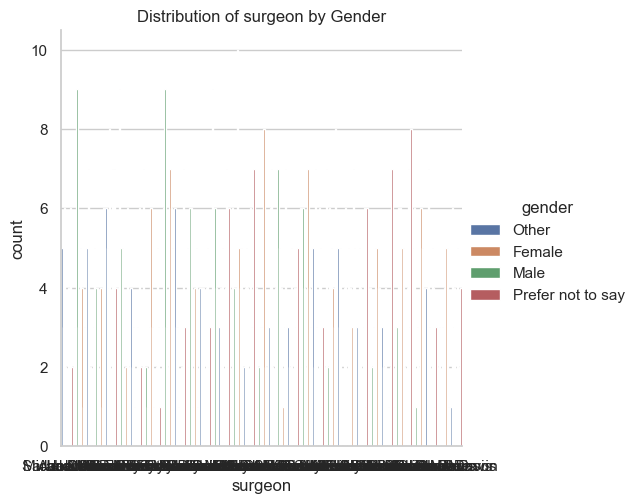

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


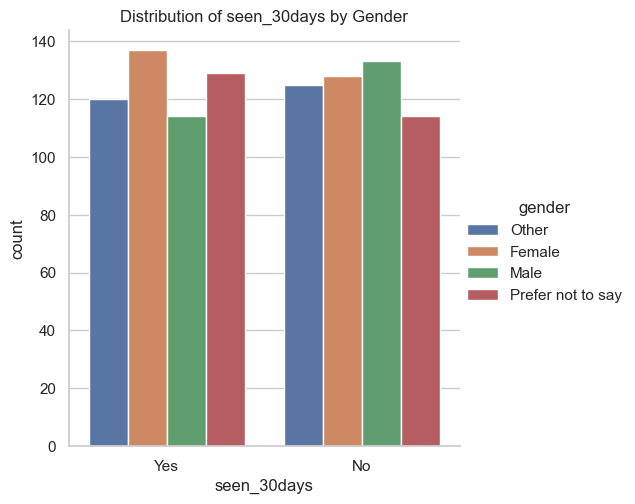

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


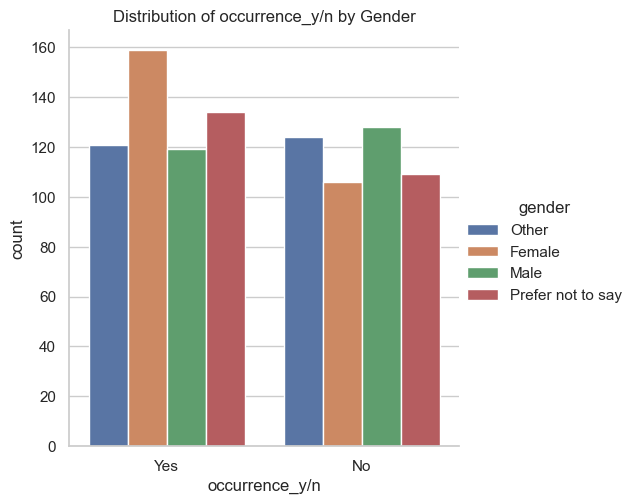

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


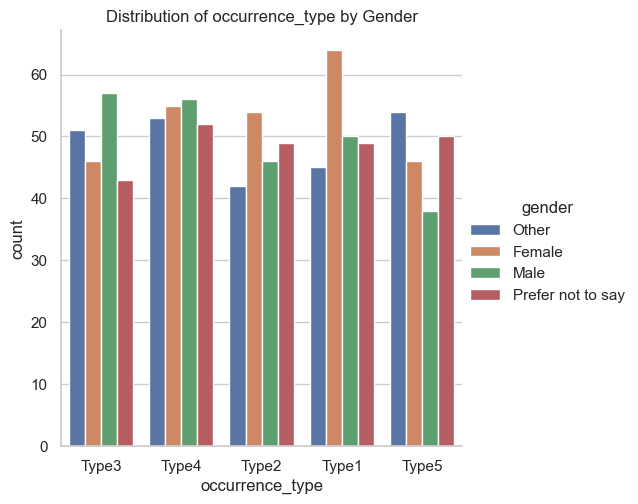

In [6]:
# Exclude the 'Gender' column and any other non-categorical columns
categorical_cols_catplot = [col for col in categorical_variables if col != 'gender']

# Create a catplot for each categorical column
for col in categorical_cols_catplot:
    sns.catplot(data=df, x=col, kind='count', hue='gender')
    plt.title(f'Distribution of {col} by Gender')
    plt.show()

In [7]:
from scipy.stats import ttest_ind

# Hypothesis Testing: T-Test
# Comparing means of the continuous variable between two gender groups
# Split data into two groups based on gender
male_group = df[df['gender'] == 'Male']
female_group = df[df['gender'] == 'Female']

# Perform t-test for each continuous variable using "gender" as the grouping criterion
for var in continuous_variables:
    t_stat, p_value = ttest_ind(male_group[var], female_group[var])
    
    print(f"T-test results for {var}:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("-" * 50)

T-test results for age:
t-statistic: 0.2372
p-value: 0.8126
--------------------------------------------------
T-test results for weight_kg:
t-statistic: -0.6796
p-value: 0.4971
--------------------------------------------------
T-test results for height_cm:
t-statistic: 0.5918
p-value: 0.5542
--------------------------------------------------
T-test results for blood_pressure_systolic:
t-statistic: -0.2203
p-value: 0.8257
--------------------------------------------------
T-test results for blood_pressure_diastolic:
t-statistic: -0.1036
p-value: 0.9175
--------------------------------------------------
T-test results for cholesterol_level:
t-statistic: 1.0659
p-value: 0.2870
--------------------------------------------------
T-test results for blood_glucose_level:
t-statistic: 0.4057
p-value: 0.6851
--------------------------------------------------


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for each continuous variable using "gender" as the grouping variable
for var in continuous_variables:
    model = ols(f'{var} ~ gender', data=df).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)

    print(f"ANOVA results for {var}:\n", anova_results)
    print("-" * 50)

ANOVA results for age:
                 sum_sq     df         F    PR(>F)
gender      1342.88614    3.0  0.527026  0.663793
Residual  845951.18486  996.0       NaN       NaN
--------------------------------------------------
ANOVA results for weight_kg:
                 sum_sq     df         F    PR(>F)
gender    1.584487e+03    3.0  0.509471  0.675821
Residual  1.032540e+06  996.0       NaN       NaN
--------------------------------------------------
ANOVA results for height_cm:
                  sum_sq     df         F    PR(>F)
gender       149.902856    3.0  0.165906  0.919365
Residual  299974.732304  996.0       NaN       NaN
--------------------------------------------------
ANOVA results for blood_pressure_systolic:
                  sum_sq     df         F    PR(>F)
gender        65.660085    3.0  0.031728  0.992404
Residual  687065.843915  996.0       NaN       NaN
--------------------------------------------------
ANOVA results for blood_pressure_diastolic:
                  

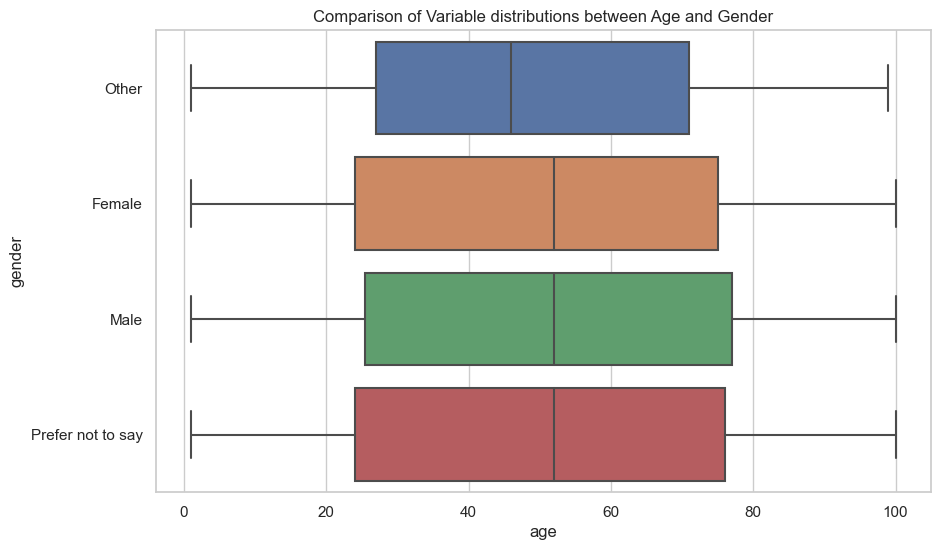

In [9]:
# Visualization: Boxplot to compare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='gender', data=df)
plt.title('Comparison of Variable distributions between Age and Gender')
plt.savefig('boxplot.png')


# Show plots
plt.show()

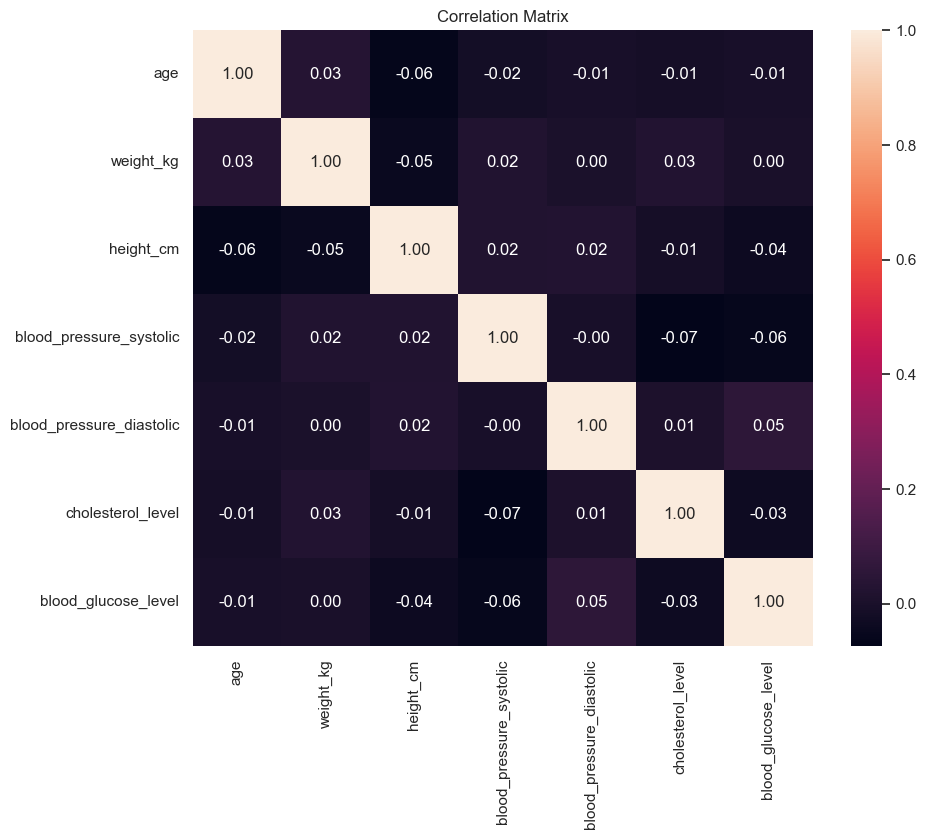

In [11]:
# Correlation Analysis
correlation_matrix = df[continuous_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

# Show plots
plt.show()

Chi-square value: 9.7466
P-value: 0.6382


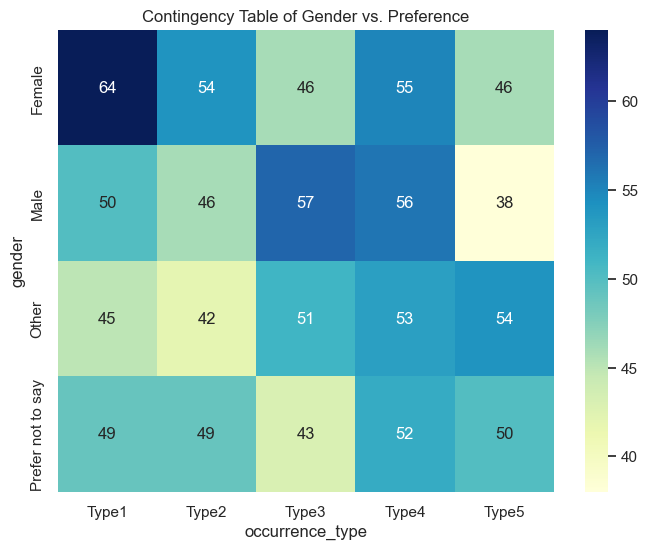

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['occurrence_type'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Visualize the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Contingency Table of Gender vs. Preference')
plt.show()
